In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("high_diamond_ranked_10min.csv")

In [51]:
#preparing and choosing data for analysis

df["goldDiff"] = df["blueTotalGold"] - df["redTotalGold"]
df["expDiff"] = df["blueTotalExperience"] - df["redTotalExperience"]
df["killDiff"] = df["blueKills"] - df["redKills"]
df["wardDiff"] = df["blueWardsPlaced"] - df["redWardsPlaced"]


features = ["blueEliteMonsters", "blueTowersDestroyed", "blueFirstBlood", "goldDiff", "expDiff", "killDiff", "wardDiff"]


X = df[features]
y = df["blueWins"]


In [52]:
#splitting data for testing and training parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [53]:
#creating and training model

base_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

base_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [54]:
#predicting test split
y_pred_base = base_model.predict(X_test)

#metric calculation
acc_base = accuracy_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)

print(f"accuracy: {acc_base:.3f}")
print(f"f1 Score: {f1_base:.3f}")

#detailed raport
print("\nclassification Report:")
print(classification_report(y_test, y_pred_base))


accuracy: 0.711
f1 Score: 0.710

classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       990
           1       0.71      0.71      0.71       986

    accuracy                           0.71      1976
   macro avg       0.71      0.71      0.71      1976
weighted avg       0.71      0.71      0.71      1976



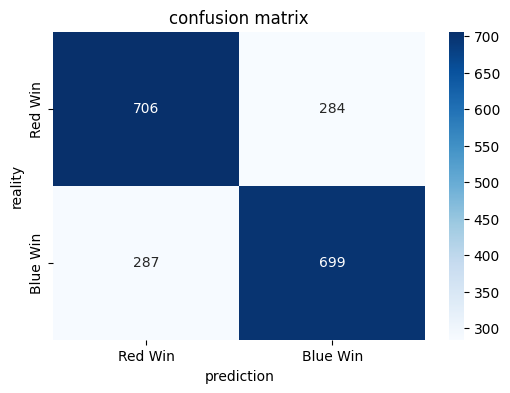

In [55]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred_base)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Red Win", "Blue Win"], yticklabels=["Red Win", "Blue Win"])
plt.xlabel("prediction")
plt.ylabel("reality")
plt.title("confusion matrix")
plt.show()


importance of features:
               Feature  Importance
3             goldDiff    0.370537
4              expDiff    0.283303
5             killDiff    0.183363
6             wardDiff    0.090664
0    blueEliteMonsters    0.041512
2       blueFirstBlood    0.021139
1  blueTowersDestroyed    0.009483


C:\Users\HARDPC\AppData\Local\Temp\ipykernel_14512\1731736180.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


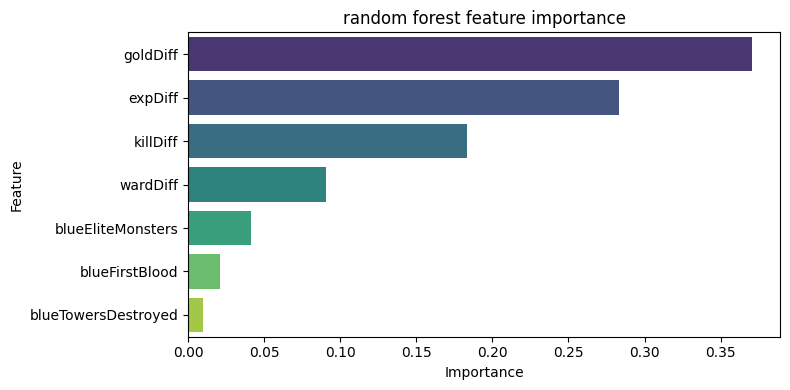

In [56]:
#importance of features
importances = base_model.feature_importances_
feature_names = X.columns
feat_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nimportance of features:")
print(feat_importance_df)

#importance chart
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title("random forest feature importance")
plt.tight_layout()
plt.show()

model results

base model - accuracy: 0.711, f1 score: 0.710
experiment 1 - accuracy: 0.699, f1 score: 0.698
experiment 2 - accuracy: 0.701, f1 score: 0.701


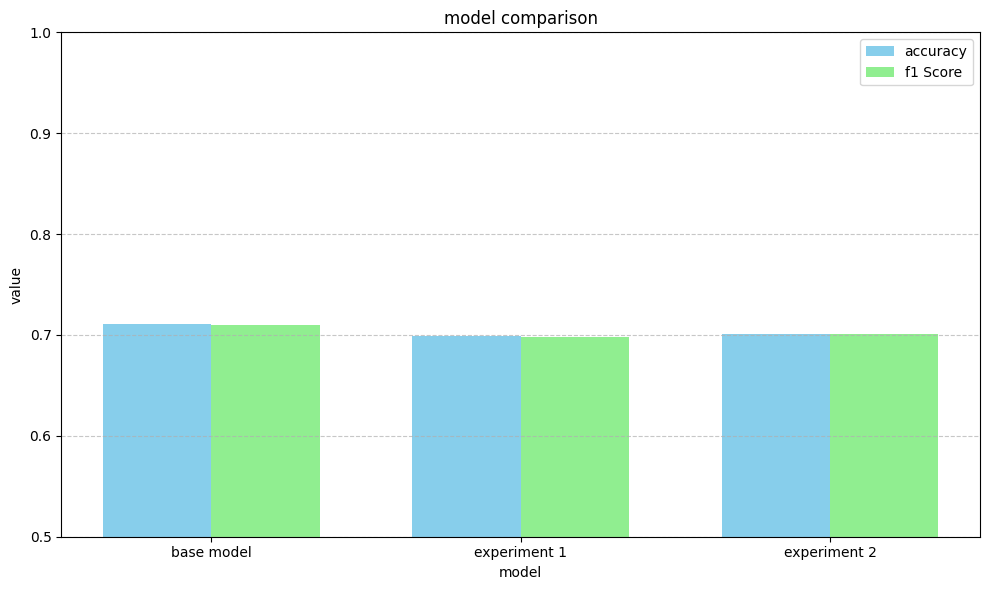

In [57]:

#experiment 1
model_exp1 = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
model_exp1.fit(X_train, y_train)
y_pred_exp1 = model_exp1.predict(X_test)
acc_exp1 = accuracy_score(y_test, y_pred_exp1)
f1_exp1 = f1_score(y_test, y_pred_exp1)

#experiment 2
model_exp2 = RandomForestClassifier(n_estimators=500, max_depth=30, random_state=42)
model_exp2.fit(X_train, y_train)
y_pred_exp2 = model_exp2.predict(X_test)
acc_exp2 = accuracy_score(y_test, y_pred_exp2)
f1_exp2 = f1_score(y_test, y_pred_exp2)

#printing exact results
print("model results\n")
print(f"base model - accuracy: {acc_base:.3f}, f1 score: {f1_base:.3f}")
print(f"experiment 1 - accuracy: {acc_exp1:.3f}, f1 score: {f1_exp1:.3f}")
print(f"experiment 2 - accuracy: {acc_exp2:.3f}, f1 score: {f1_exp2:.3f}")

#comparison chart
labels = ['base model','experiment 1', 'experiment 2']
accuracies = [acc_base, acc_exp1, acc_exp2]
f1_scores = [f1_base, f1_exp1, f1_exp2]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, accuracies, width=width, label='accuracy', color='skyblue')
bars2 = plt.bar([i + width for i in x], f1_scores, width=width, label='f1 Score', color='lightgreen')


plt.xlabel("model")
plt.ylabel("value")
plt.title("model comparison")
plt.xticks([i + width / 2 for i in x], labels)
plt.ylim(0.5, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


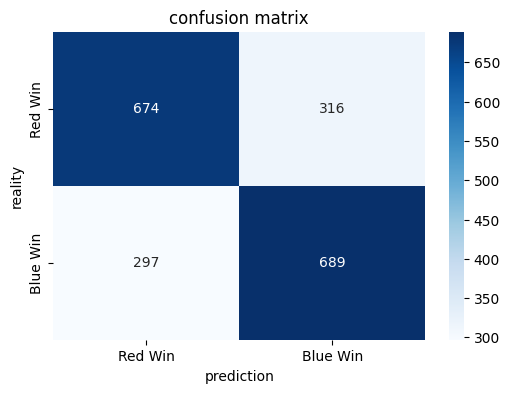

In [ ]:
#another model 

#data normalization (required by knn)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#base model: k = 5
base_knn_model = KNeighborsClassifier(n_neighbors=5)
base_knn_model.fit(X_train_scaled, y_train)
y_pred_base = base_knn_model.predict(X_test_scaled)
acc_base = accuracy_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)

print(classification_report(y_test, y_pred_base))

#confusion matrix
cm = confusion_matrix(y_test, y_pred_base)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Red Win", "Blue Win"], yticklabels=["Red Win", "Blue Win"])
plt.xlabel("prediction")
plt.ylabel("reality")
plt.title("confusion matrix")
plt.show()

knn model results:

base knn model - accuracy: 0.690, f1 score: 0.692
knn exp 1 (k=15) - accuracy: 0.716, f1 score: 0.716
knn exp 2 (k=1) - accuracy: 0.657, f1 score: 0.660


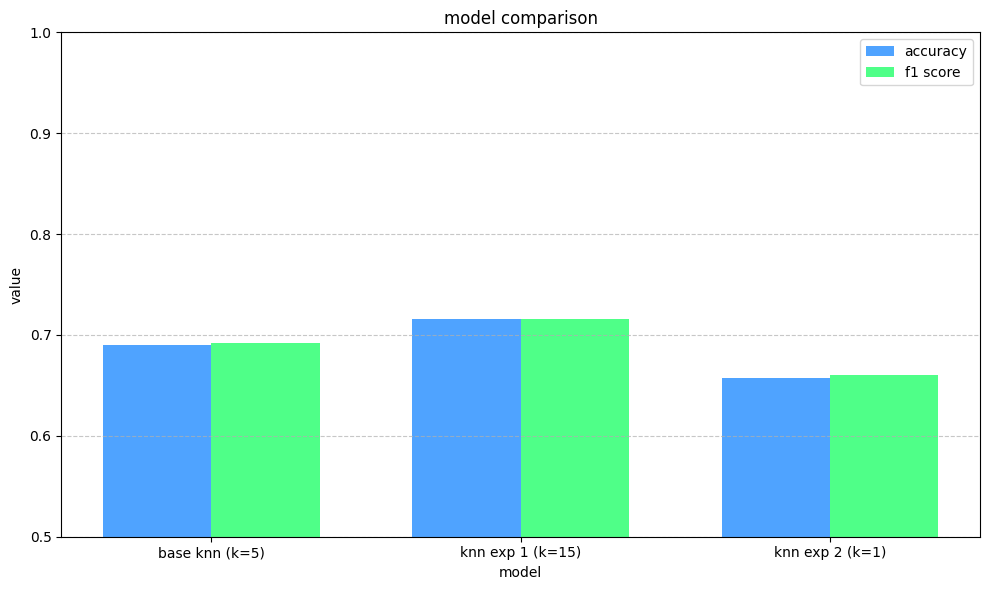

In [59]:
#experiment 1: k = 15
knn_exp1 = KNeighborsClassifier(n_neighbors=15)
knn_exp1.fit(X_train_scaled, y_train)
y_pred_exp1 = knn_exp1.predict(X_test_scaled)
acc_exp1 = accuracy_score(y_test, y_pred_exp1)
f1_exp1 = f1_score(y_test, y_pred_exp1)

#experiment 2: k = 1
knn_exp2 = KNeighborsClassifier(n_neighbors=1)
knn_exp2.fit(X_train_scaled, y_train)
y_pred_exp2 = knn_exp2.predict(X_test_scaled)
acc_exp2 = accuracy_score(y_test, y_pred_exp2)
f1_exp2 = f1_score(y_test, y_pred_exp2)

#results printing
print("knn model results:\n")
print(f"base knn model - accuracy: {acc_base:.3f}, f1 score: {f1_base:.3f}")
print(f"knn exp 1 (k=15) - accuracy: {acc_exp1:.3f}, f1 score: {f1_exp1:.3f}")
print(f"knn exp 2 (k=1) - accuracy: {acc_exp2:.3f}, f1 score: {f1_exp2:.3f}")

#chart
labels = ['base knn (k=5)', 'knn exp 1 (k=15)', 'knn exp 2 (k=1)']
accuracies = [acc_base, acc_exp1, acc_exp2]
f1_scores = [f1_base, f1_exp1, f1_exp2]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, accuracies, width=width, label='accuracy', color='#4fa3ff')
bars2 = plt.bar([i + width for i in x], f1_scores, width=width, label='f1 score', color='#4fff88')

plt.xlabel("model")
plt.ylabel("value")
plt.title("model comparison")
plt.xticks([i + width / 2 for i in x], labels)
plt.ylim(0.5, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()